<a href="https://colab.research.google.com/github/bereml/iap/blob/master/libretas/1c_reglin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3

## Cisneros Aguilar Sara Kenia
Entrena una red completamente conectada para aproximar la compuerta XOR. (3 puntos)

## 1. Preparación

In [ ]:
import math
# sistema de archivos
import os
# números aleatorios
import random

# gráficas
import matplotlib.pyplot as plt
# arreglos multidimensionales
import numpy as np
# csv
import pandas as pd

# redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# definimos los datos
X = np.array([
    [0., 0.], 
    [0., 1.], 
    [1., 0.], 
    [1., 1.]
])

y_real = np.array([0,1,1,0]).reshape(-1,1)

In [ ]:
x = torch.tensor(X)
x = x.view(-1, 2).type(torch.float32)
y = torch.tensor(y_real)
y = y.view(-1, 1).type(torch.float32)
print(x.shape)
print(y.shape)

torch.Size([4, 2])
torch.Size([4, 1])


In [ ]:
# creamos un DataLoader
ds = TensorDataset(x, y)
dl = DataLoader(ds, shuffle=True)

## 2. Modelo

In [ ]:
# modelo
class XOR(nn.Module):
    #se define el inicializador
    def __init__(self, channels_1, channels_2):
        super(XOR, self).__init__()
        self.channels_1 = channels_1
        self.channels_2 = channels_2

        self.xor = nn.Sequential(
            nn.Linear(2, self.channels_1),
            nn.ReLU(),
            nn.Linear(self.channels_1, self.channels_2),
            nn.ReLU(),
            nn.Linear(self.channels_2, 1),
        )
    # método para inferencia
    def forward(self, x):
        return self.xor(x)

In [ ]:
# optimizador
def train(model, dl, alpha = 1e-3, epochs = 100):
    loss_fn = torch.nn.BCEWithLogitsLoss(size_average=False)
    opt = optim.SGD(model.parameters(), lr = alpha)

    # historial de pérdida
    loss_hist = []
    # ciclo de entrenamiento
    for epoch in range(epochs):
        loss_hist_ = []
        # entrenamiento de una época
        for x, y_true in dl:
            # hacemos inferencia para obtener los logits
            y_lgts = model(x)
            # calculamos de pérdida
            loss = loss_fn(y_lgts, y_true)
            # vaciamos los gradientes
            opt.zero_grad()
            # retropropagamos
            loss.backward()
            # actulizamos parámetros
            opt.step()

            # guardamos historial de pérdida
            loss_hist_.append(loss.item())
            
        # imprimimos la pérdida de la época
        loss = np.mean(loss_hist_)
        loss_hist.append(loss)
    return loss_hist

## 3. Entrenamiento

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


XOR(
  (xor): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
  )
)


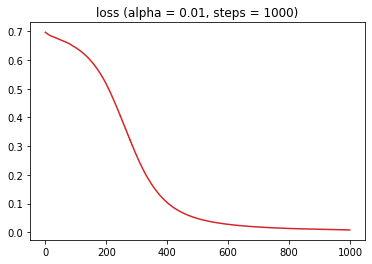

In [ ]:
channels_1 = 30
channels_2 = 15
epochs = 1000
alpha = 0.01
model = XOR(channels_1 = channels_1, channels_2 = channels_2)
loss = train(model, dl, epochs=epochs, alpha=alpha)
print(model)
plt.figure()
plt.plot(range(len(loss)), loss, color='tab:red')
plt.title(f'loss (alpha = {alpha}, steps = {epochs})')
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


XOR(
  (xor): Sequential(
    (0): Linear(in_features=2, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
  )
)


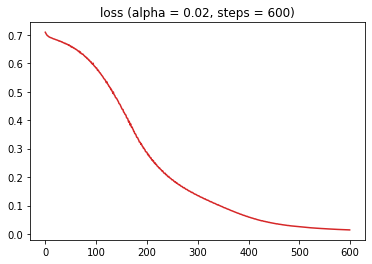

In [ ]:
channels_1 = 30
channels_2 = 15
epochs = 600
alpha = 0.02
model = XOR(channels_1 = channels_1, channels_2 = channels_2)
loss = train(model, dl, epochs=epochs, alpha=alpha)
print(model)
plt.figure()
plt.plot(range(len(loss)), loss, color='tab:red')
plt.title(f'loss (alpha = {alpha}, steps = {epochs})')
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


XOR(
  (xor): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


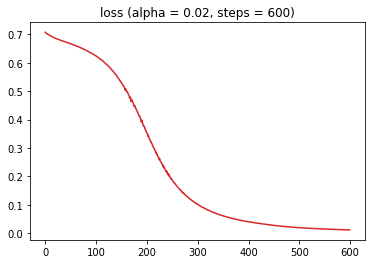

In [ ]:
channels_1 = 10
channels_2 = 5
epochs = 600
alpha = 0.02
model = XOR(channels_1 = channels_1, channels_2 = channels_2)
loss = train(model, dl, epochs=epochs, alpha=alpha)
print(model)
plt.figure()
plt.plot(range(len(loss)), loss, color='tab:red')
plt.title(f'loss (alpha = {alpha}, steps = {epochs})')
plt.show()

Como pudimos ver, en el primer experimento con 1000 epocas y una tasa de 0.01 se alcanza la convergencia  apartir de la epoca 800, en un intento de reducir las epocas se utilizan 600 con una tasa de 0.02 alcanzando la convergencia a las 400 epocas, sin cambiar la arquitectura de la red, en este caso vemos utilizando la mitad de epocas y el doble de la tasa de aprendizaje logramos la misma convergencia.

En un intento de disminuir la cantidad de neuronas se considera un tercio de las iniciales y se puede ver que con este cambio se requieren más epocas.

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


XOR(
  (xor): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)


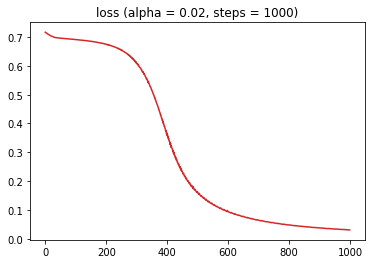

In [ ]:
channels_1 = 10
channels_2 = 5
epochs = 1000
alpha = 0.02
model = XOR(channels_1 = channels_1, channels_2 = channels_2)
loss = train(model, dl, epochs=epochs, alpha=alpha)
print(model)
plt.figure()
plt.plot(range(len(loss)), loss, color='tab:red')
plt.title(f'loss (alpha = {alpha}, steps = {epochs})')
plt.show()